In [23]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from utils  import merge_multiple_tables_custom, save_plot
import os

pd.set_option('display.max_rows', 200)

### Plotting modes for weekdays

For the analyzis I am going to calculate the mode for every day and plot them, changing the following input parameters:
- route
- age
- discount
- tariffClass
- ticket_type

In [24]:
def get_modes(route, age, discount, tariffClass, ticket_type, start, number_of_days, end):
    path=f'data/{route}/data_{age}_{discount}_{tariffClass}'
    df = merge_multiple_tables_custom(path, start, number_of_days, end)
    
    df['date'] = pd.to_datetime(df['datetime dep']).dt.date
    df = df.loc[df['ticket type'] == ticket_type]
    df['weekday'] = pd.to_datetime(df['date']).dt.day_name()
    
    mode_per_day = df.groupby(['date'])['price'].agg(pd.Series.mode).to_frame()
    # mode_per_day = df.groupby(['date']).mean()
    
    mode_per_day = mode_per_day.rename(columns={'price': 'mode price'})
    mode_per_day['weekday'] = mode_per_day.index
    mode_per_day['weekday'] = pd.to_datetime(mode_per_day['weekday']).dt.day_name()
    
    return mode_per_day
    

In [29]:
def plot(df, route):
    palette = {'Monday': 'C1', 'Tuesday': 'C2', 'Wednesday': 'C3', 'Thursday': 'C4', 'Friday': 'C5', 'Saturday': 'C6', 'Sunday': 'C7', }
    plt = sb.scatterplot(data=df, x='date', y='mode price', hue='weekday', palette = palette )
    plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)
    plt.tick_params(labelsize=8)
    sb.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))
    title = f'Mode price for each day, grouped by weekdays for the route {route}'
    plt.set(title = title)
    fig = plt.get_figure()
    fig.savefig('test.png', dpi=200, bbox_inches='tight')
    return plt

/tmp/ipykernel_38587/3765343691.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)


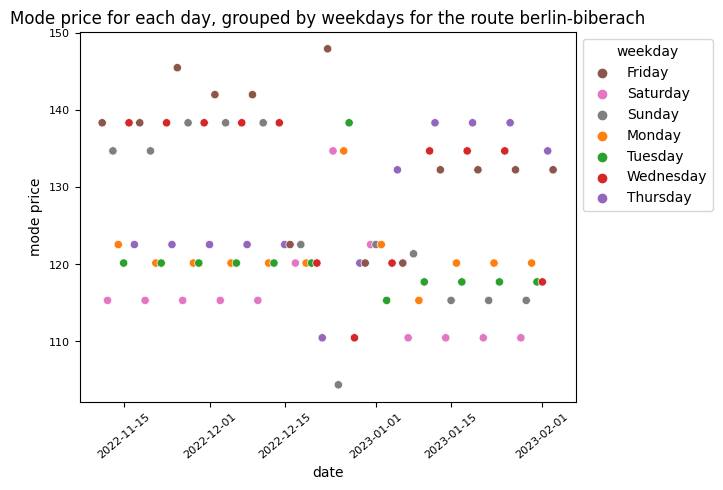

In [30]:
df = get_modes('berlin-biberach', 'E', '3', '1', 'Flexpreis', '11.11.2022', 85, None)
plt = plot(df, 'berlin-biberach')

In [146]:
summary = df.groupby(['weekday'])['mode price'].agg(pd.Series.mode).to_frame()
#summary = summary.sort_values(by=['mode price'])
summary

,mode price
weekday,
Friday,132.25
Monday,120.15
Saturday,115.3
Sunday,"[115.3, 138.35]"
Thursday,122.55
Tuesday,120.15
Wednesday,138.35


/tmp/ipykernel_18781/34812646.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)


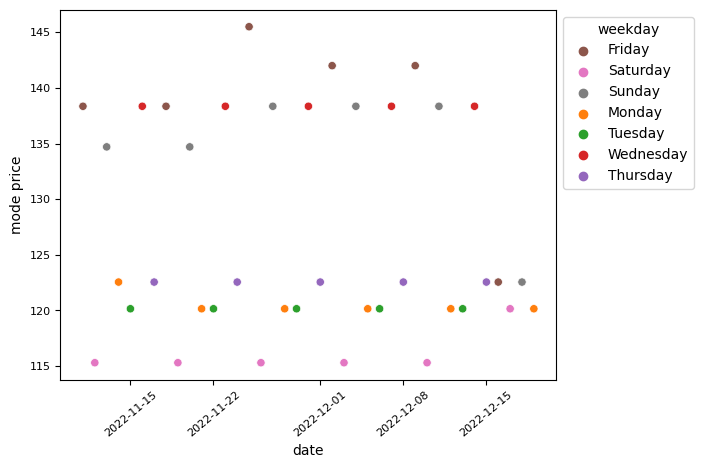

In [147]:
df = get_modes('berlin-biberach', 'E', '3', '1', 'Flexpreis', '11.11.2022', None, '20.12.2022')
plot(df, 'berlin-biberach')

/tmp/ipykernel_18781/34812646.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)


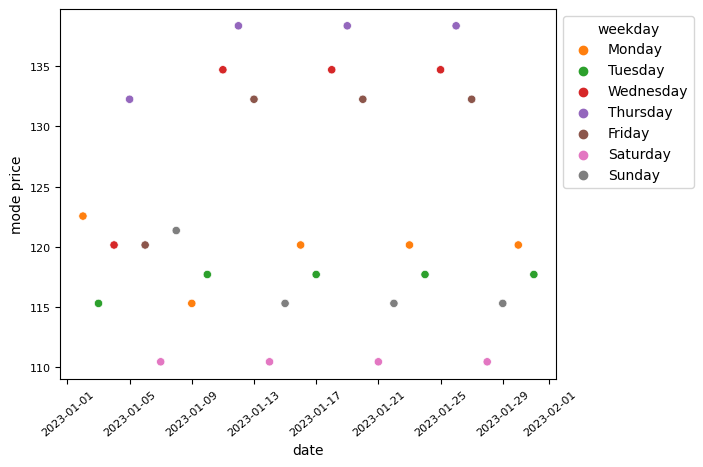

In [148]:
df = get_modes('berlin-biberach', 'E', '3', '1', 'Flexpreis', '02.01.2023', 30, None)
plot(df)

The above plots confirms the previously observed suspicion:
Saturday is the cheapest day, followed by Monday and Tuesday, slightly more expensive is Thursday. Sunday and Wednesday are already significantly expensive and Friday is the most expensive day of the week. However, we can observe this pattern only until shortly before Christmas, then the prices vary due to the holidays. In the new year, a pattern is also emerging, but this is different from the previous one. Since I could only collect data until the beginning of February, it is unclear whether this pattern continues or whether it is a discount campaign for the new year.

In [149]:
# get overall mode for weekday for set of input parameters, combine multiple weekday modes with 
# different input parameters for same route in one plot
# Sparpreis tickets ? 



In [150]:
df = get_modes('berlin-biberach', 'E', '3', '1', 'Super Sparpreis', '11.11.2022', 80, None)
plot(df)


ValueError: Must produce aggregated value

In [ ]:
def test(route, age, discount, tariffClass, ticket_type, start, number_of_days, end):
    return f'data/{route}/data_{age}_{discount}_{tariffClass}'
    

In [118]:
path = test('berlin-biberach', 'E', '3', '1', 'Super Sparpreis', '11.11.2022', 85, None)

In [125]:
ticket_type = 'Sparpreis'
df = merge_multiple_tables_custom(path, '11.11.2022', 85, None)
    
df['date'] = pd.to_datetime(df['datetime dep']).dt.date
df = df.loc[df['ticket type'] == ticket_type]
df['weekday'] = pd.to_datetime(df['date']).dt.day_name()
df.head()

,price,ticket type,age,discount,departure,destination,changes,tariffClass,datetime dep,datetime arr,sub [min],time,date,weekday
1,109.4,Sparpreis,E,3,Berlin,Biberach,1,1,2022-11-11 05:28:00,2022-11-11 12:40:00,432.0,05:28,2022-11-11,Friday
5,82.4,Sparpreis,E,3,Berlin,Biberach,2,1,2022-11-11 05:34:00,2022-11-11 11:36:00,362.0,05:34,2022-11-11,Friday
9,113.9,Sparpreis,E,3,Berlin,Biberach,2,1,2022-11-11 06:01:00,2022-11-11 12:34:00,393.0,06:01,2022-11-11,Friday
13,133.4,Sparpreis,E,3,Berlin,Biberach,1,1,2022-11-11 07:28:00,2022-11-11 14:42:00,434.0,07:28,2022-11-11,Friday
17,79.4,Sparpreis,E,3,Berlin,Biberach,2,1,2022-11-11 07:37:00,2022-11-11 13:40:00,363.0,07:37,2022-11-11,Friday


In [128]:
mode_per_day = df.groupby(['date'])['price'].apply(pd.Series.mode).to_frame()

#mode_per_day = mode_per_day.rename(columns={'price': 'mode price'})
#mode_per_day['weekday'] = mode_per_day.index
#mode_per_day['weekday'] = pd.to_datetime(mode_per_day['weekday']).dt.day_name()

In [129]:
mode_per_day

price
date               
2022-11-11 0   64.4
           1   79.4
           2   82.4
2022-11-12 0   88.4
2022-11-13 0   82.4
           1  124.4
2022-11-14 0   82.4
2022-11-15 0   85.4
2022-11-16 0   88.4
2022-11-17 0   85.4
2022-11-18 0   67.4
2022-11-19 0   82.4
2022-11-20 0   79.4
2022-11-21 0   70.4
           1   76.4
           2   85.4
2022-11-22 0   70.4
           1   71.9
2022-11-23 0   68.9
2022-11-24 0   82.4
2022-11-25 0  121.4
2022-11-26 0   82.4
2022-11-27 0   82.4
2022-11-28 0   79.4
2022-11-29 0   43.4
2022-11-30 0   31.4
2022-12-01 0   68.9
2022-12-02 0  112.4
2022-12-03 0   62.9
           1   76.4
2022-12-04 0   62.9
           1   68.9
           2   74.9
           3  112.4
2022-12-05 0   67.4
2022-12-06 0   31.4
           1   38.9
2022-12-07 0   31.4
           1   38.9
2022-12-08 0   38.9
           1   79.4
2022-12-09 0   70.4
2022-12-10 0   62.9
           1   76.4
2022-12-11 0  107.9
2022-12-12 0   76.4
2022-12-13 0   31.4
2022-12-14 0   31.4
2022-12-15 0   31.4
           1   76.4
2022-12-16 0   40.4
           1   46.4
           2   55.4
           3   56.9
           4   70.4
           5   74.9
           6  107.9
2022-12-17 0   46.4
2022-12-18 0   65.9
           1   70.4
2022-12-19 0   76.4
2022-12-20 0   38.9
           1   67.4
           2   70.4
           3   74.9
2022-12-21 0   71.9
2022-12-22 0   61.4
2022-12-23 0  143.9
2022-12-24 0   71.9
2022-12-25 0   38.9
           1   46.4
           2   53.9
           3   56.9
2022-12-26 0   79.4
2022-12-27 0  107.9
2022-12-28 0   70.4
2022-12-29 0   59.9
2022-12-30 0   38.9
           1   55.4
           2   62.9
           3   71.9
           4   76.4
2022-12-31 0   38.9
2023-01-01 0   76.4
           1   88.4
2023-01-02 0   56.9
2023-01-03 0   59.9
2023-01-04 0   31.4
2023-01-05 0   31.4
2023-01-06 0   61.4
2023-01-07 0   70.4
2023-01-08 0   61.4
2023-01-09 0   31.4
2023-01-10 0   31.4
2023-01-11 0   31.4
2023-01-12 0   31.4
2023-01-13 0   31.4
2023-01-14 0   31.4
2023-01-15 0   31.4
           1   65.9
2023-01-16 0   70.4
2023-01-17 0   31.4
2023-01-18 0   31.4
2023-01-19 0   31.4
2023-01-20 0   31.4
2023-01-21 0   31.4
2023-01-22 0   65.9
           1   70.4
2023-01-23 0   61.4
2023-01-24 0   31.4
2023-01-25 0   31.4
2023-01-26 0   31.4
2023-01-27 0   74.9
           1   76.4
           2  110.9
2023-01-28 0   31.4
2023-01-29 0   82.4
2023-01-30 0   61.4
           1   70.4
2023-01-31 0   31.4
2023-02-01 0   31.4
2023-02-02 0   31.4
2023-02-03 0   92.9